<a href="https://colab.research.google.com/github/liao771018/tibame-DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [50]:
# 如果是 mnist 資料集要改成 (60000, 28, 28, 1)

print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)
# (50000, 32, 32, 3) (50000, 1)
# (10000, 32, 32, 3) (10000, 1)
# y 裡面是一個表格，表格內有 1 個欄位 ( 也就是答案非互斥，可以有多個 )

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [51]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

答案是 automobile


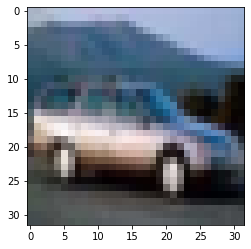

In [52]:
import matplotlib.pyplot as plt

idx = 4
print('答案是', trans[y_train[idx][0]])
plt.imshow(x_train[idx])


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D

layers = [
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(32,32,3)), 
    # param = ( (3*3)kernel_size * 3(previous depth) ) * 64(filters) + 64(bias) = 1792
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'), # 這層好像沒有減少 val_loss 多少
    MaxPooling2D(),
    # Flatten(),
    GlobalAveragePooling2D(),
    # Dense(128, activation='relu'),
    # 希望大部分的 param 在卷積層，不在 MLP
    Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 4, 4, 256)       

In [54]:
# Sparse 是指答案 [5] -> 第 5 個位置是 1，其他是 0 
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0


In [55]:
# 開始訓練模型

# ModelCheckpoint: 儲存模型, 副檔名 .h5 ,save_best_only=只存最好的那次
# EarlyStopping: 設定停止訓練的條件, patience=連續幾次沒有進步就停, restore_best_weights=回復到最好的那次
# val loss穩定的時候就停, 不要過擬合
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

# batch_size: 你看多少筆再進行一次梯度下降 ( 5[圖片大/訓練資料少] - 200[圖片小/訓練資料多] )
# epochs: 全體資料(60000) 要做幾輪訓練 (我們什麼時候要停的關鍵)
# validation_split: 從訓練資料切出要做為驗證資料的比例
# (60000 * 0.9) / 200 -> 270
# verbose: 顯示處理進度 0(quiet) 1(full) 2(no progress bar)

model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     validation_split=0.1,
     verbose=2,
     callbacks=callbacks)


Epoch 1/50
225/225 - 7s - loss: 1.7374 - accuracy: 0.3511 - val_loss: 1.4123 - val_accuracy: 0.4766 - 7s/epoch - 33ms/step
Epoch 2/50
225/225 - 6s - loss: 1.2301 - accuracy: 0.5513 - val_loss: 1.0454 - val_accuracy: 0.6344 - 6s/epoch - 28ms/step
Epoch 3/50
225/225 - 6s - loss: 0.9499 - accuracy: 0.6630 - val_loss: 0.9411 - val_accuracy: 0.6808 - 6s/epoch - 28ms/step
Epoch 4/50
225/225 - 6s - loss: 0.7902 - accuracy: 0.7215 - val_loss: 0.7750 - val_accuracy: 0.7354 - 6s/epoch - 28ms/step
Epoch 5/50
225/225 - 6s - loss: 0.6650 - accuracy: 0.7644 - val_loss: 0.6998 - val_accuracy: 0.7560 - 6s/epoch - 28ms/step
Epoch 6/50
225/225 - 6s - loss: 0.5780 - accuracy: 0.7958 - val_loss: 0.6596 - val_accuracy: 0.7656 - 6s/epoch - 28ms/step
Epoch 7/50
225/225 - 6s - loss: 0.4872 - accuracy: 0.8275 - val_loss: 0.6082 - val_accuracy: 0.7908 - 6s/epoch - 28ms/step
Epoch 8/50
225/225 - 6s - loss: 0.4002 - accuracy: 0.8582 - val_loss: 0.6775 - val_accuracy: 0.7818 - 6s/epoch - 27ms/step
Epoch 9/50
225/2

In [56]:
model.evaluate(x_test_norm, y_test)
# 測出來後可以再回頭調整模型重跑一次看結果

313/313 [==============================] - 2s 5ms/step - loss: 0.6547 - accuracy: 0.7782


[0.6546671986579895, 0.7781999707221985]

In [58]:
# 預測值
pre = model.predict(x_test_norm).argmax(axis=-1)

# 注意 shape 是不同的，不能比較，要先用 reshape 轉換
print(pre, pre.shape)     # (10000,)
print(y_test, y_test.shape)  # (10000, 1)

y_test_r = y_test.reshape(10000)
print(y_test_r, y_test_r.shape)

[5 8 8 ... 5 1 7] (10000,)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]] (10000, 1)
[3 8 8 ... 5 1 7] (10000,)


In [62]:
# 做混淆矩陣的對照表格
from sklearn.metrics import confusion_matrix
import pandas as pd

# axis=0, 取出同一欄中 列 最大的
# axis=1, 取出同一列中 欄 最大的  ( axis=-1 == axis=1 )
# argmax 會回傳最大值的 index
pre = model.predict(x_test_norm).argmax(axis=-1)

mat = confusion_matrix(y_test_r, pre)

pd.DataFrame(mat,
      columns=['{}(預測)'.format(trans[i]) for i in range(10)],
      index = ['{}(真實)'.format(trans[i]) for i in range(10)])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),854,11,28,12,18,2,7,8,44,16
automobile(真實),24,847,5,4,1,6,6,0,29,78
bird(真實),69,0,670,34,84,60,40,23,11,9
cat(真實),23,10,56,536,74,190,45,41,13,12
deer(真實),23,2,38,41,798,25,17,47,7,2
dog(真實),9,4,35,113,47,716,15,48,4,9
frog(真實),6,4,50,53,47,18,801,8,6,7
horse(真實),12,2,24,21,65,45,4,814,3,10
ship(真實),48,9,6,8,6,1,4,2,907,9
truck(真實),55,43,8,11,5,5,3,8,23,839


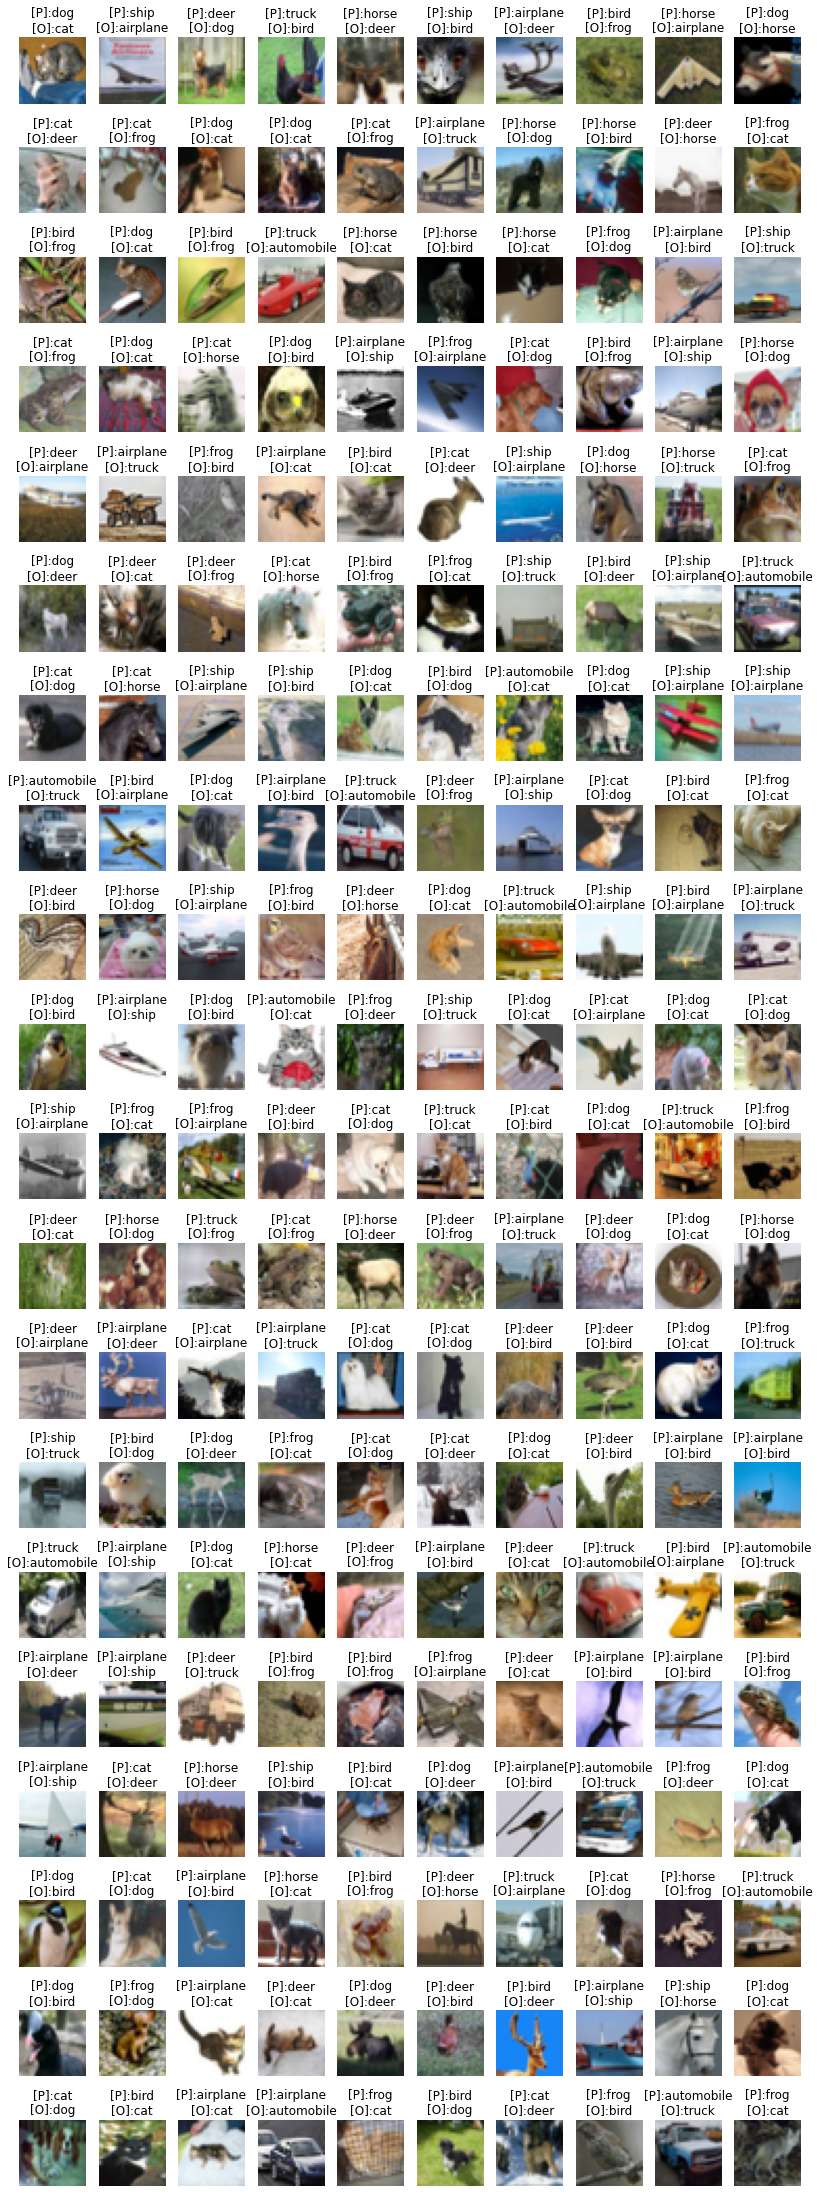

In [64]:
# 列出預測錯誤的看一下
import numpy as np

# 太多了，取前兩百筆就好
# 預測不對的idx
idx = np.nonzero(pre != y_test_r)[0][:200]

# 預測不對的圖的正確答案
pre_false_label = y_test_r[idx]

# 預測不對的圖的預測值
pre_false_pred = pre[idx]

# 預測不對的圖的原圖
pre_false_img = x_test[idx]

plt.figure(figsize=(14, 42))

width = 10
height = len(idx) // width + 1

for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(trans[pre_false_pred[i]], trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

網址:https://s9.rr.itc.cn/r/wapChange/20163_17_5/a65m3f6764560484362.jpeg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[7.56221125e-04 7.21284014e-05 1.17281534e-01 3.02819490e-01
 5.57752512e-02 4.44826066e-01 1.97836943e-02 5.22675887e-02
 3.67188710e-04 6.05080463e-03]

airplane 的機率: 0.0008
automobile 的機率: 1e-04
bird 的機率: 0.1173
cat 的機率: 0.3028
deer 的機率: 0.0558
dog 的機率: 0.4448
frog 的機率: 0.0198
horse 的機率: 0.0523
ship 的機率: 0.0004
truck 的機率: 0.0061


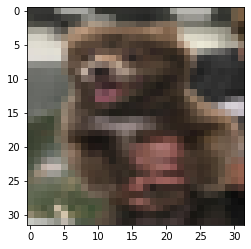

In [74]:
# PIL: pillow 處理圖片的函式庫 (用OpenCV也可以)

import requests
from PIL import Image 

# https://s9.rr.itc.cn/r/wapChange/20163_17_5/a65m3f6764560484362.jpeg
url = input("網址:")
response = requests.get(url, stream=True, verify=False) 

# 圖片讀出來轉成模型用的 32*32 RGB
img = Image.open(response.raw).resize((32, 32)).convert("RGB")

# 給模型訓練的圖片當初怎麼進去, 現在就要怎麼進去, 所以 (32, 32, 3) 和 (1, 32, 32, 3) 是不一樣的
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
prob = model.predict(img_np)[0]
print(prob, end='\n\n')

# 列出各種類的機率
for t, p in zip(trans, prob):
    print(t, "的機率:", round(p, 4))
plt.imshow(img)

In [80]:
# 手動存檔: model.save('cnn.h5')
# 手動讀檔: load_model('cnn.h5')
# 不用再 compile, 可以繼續 fit/predict/evaulate
model.save('/content/drive/MyDrive/0704test/cnn.h5')


In [81]:
# 讀取模型
from tensorflow.keras.models import load_model
import os

modelpath = '/content/drive/MyDrive/0704test/cnn.h5'

if not os.path.exists(modelpath):

  print('創造中...')
  layers = [
    Conv2D(64, 3, padding='same', activation='relu', input_shape=(32,32,3)), 
    # param = ( (3*3)kernel_size * 3(previous depth) ) * 64(filters) + 64(bias) = 1792
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'), # 這層好像沒有減少 val_loss 多少
    MaxPooling2D(),
    # Flatten(),
    GlobalAveragePooling2D(),
    # Dense(128, activation='relu'),
    # 希望大部分的 param 在卷積層，不在 MLP
    Dense(10, activation='softmax')
  ]

  model = Sequential(layers)
  model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])
  
else:
  print('讀取中...')
  load_model(modelpath)

model.summary()

讀取中...
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 4, 4, 256